<a href="https://colab.research.google.com/github/GastonGago/PEC2_Gago_AnaliticaEscalable/blob/main/TFM_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jul 13 05:14:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
import pandas as pd

df = pd.read_csv('tfmdata.csv', delimiter=';', header=1)


In [6]:
df.shape

(20119, 41)

In [7]:
df.info

<bound method DataFrame.info of        IdLugarSalida            Lugar Salida  IdTranspSalidad  \
0                  4                    Chuy                2   
1                 18              Río Branco                2   
2                  3  Aeropuerto de Carrasco                1   
3                  3  Aeropuerto de Carrasco                1   
4                  4                    Chuy                2   
...              ...                     ...              ...   
20114              7             Fray Bentos                2   
20115              3  Aeropuerto de Carrasco                1   
20116             10                   Salto                2   
20117              7             Fray Bentos                2   
20118              8                Paysandú                2   

      Transporte Internacional de Salida FechaSalida  IdFecSalida  \
0                         Terrestre Auto  29/12/2016        13512   
1                         Terrestre Auto  29/12/2

In [8]:
# Supongamos que tienes un DataFrame llamado df
column_names = df.columns

# Imprime los nombres de las columnas
print(column_names)

Index(['IdLugarSalida', 'Lugar Salida', 'IdTranspSalidad',
       'Transporte Internacional de Salida', 'FechaSalida', 'IdFecSalida',
       'FechaEntrada', 'IdFecEntrada', 'IdNacionalidad', 'Pais',
       'IdDeptoResidencia', 'Departamento', 'IdMotivo', 'Motivo',
       'IdOcupacion', 'Ocupacion', 'IdNivelEstudio', 'Estudio', 'IdDestino',
       'Destino', 'IdAlojamiento', 'Alojamiento', 'IdLugarIngreso',
       'Lugar Ingreso', 'IdTranspIngreso',
       'Transporte Internacional de Ingreso', 'IdTranspLocal',
       'Trasporte Local', 'Estadia', 'Gente', 'GastoTotal', 'GastoAlojamiento',
       'GastoAlimentacion', 'GastoTransporteInternac', 'GatoTransporteLocal',
       'GastoCultural', 'GastoTours', 'GastoCompras', 'GastoResto', 'Coef',
       'CoefTot'],
      dtype='object')


In [9]:
df.tail()

,IdLugarSalida,Lugar Salida,IdTranspSalidad,Transporte Internacional de Salida,FechaSalida,IdFecSalida,FechaEntrada,IdFecEntrada,IdNacionalidad,Pais,...,GastoAlojamiento,GastoAlimentacion,GastoTransporteInternac,GatoTransporteLocal,GastoCultural,GastoTours,GastoCompras,GastoResto,Coef,CoefTot
20114,7,Fray Bentos,2,Terrestre Auto,27/12/2022,15701,7/1/2023,15712,1,Uruguay,...,800.00,416.44,0.0,166.34,400.00,0.0,250.81,166.40,101.75,101.76
20115,3,Aeropuerto de Carrasco,1,Aereo,25/12/2022,15699,10/1/2023,15715,1,Uruguay,...,0.00,2309.63,2400.0,0.00,540.88,107.8,754.60,1287.08,247.33,247.58
20116,10,Salto,2,Terrestre Auto,27/12/2022,15701,5/1/2023,15710,1,Uruguay,...,600.00,300.00,0.0,1092.21,200.00,0.0,469.17,1179.10,79.35,78.43
20117,7,Fray Bentos,2,Terrestre Auto,26/12/2022,15700,30/12/2022,15704,1,Uruguay,...,323.82,200.00,0.0,40.00,197.16,0.0,350.00,393.03,79.35,78.43
20118,8,Paysandú,2,Terrestre Auto,11/1/2023,15716,11/1/2023,15716,1,Uruguay,...,0.00,12.69,0.0,0.00,0.00,0.0,88.86,0.00,79.35,78.43


In [10]:
# Extraer los años únicos de la columna "FechaSalida"
anios = pd.DatetimeIndex(df['FechaSalida']).year.unique()


# agrupar por mes, trimeste.
#buscar otros recomendadores (general y de viajes) / Buscar en google schoolar Recommender sistem
#Coste bajo, coste medio, coste alto en gastos

# Imprimir los años únicos
print(anios)

Int64Index([2016, 2017, 2018, 2019, 2020, 2022, 2021, 2023], dtype='int64', name='FechaSalida')


<ipython-input-10-27d8060c7d52>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  anios = pd.DatetimeIndex(df['FechaSalida']).year.unique()


In [11]:
destinations = df[['Destino', 'Pais', 'Departamento', 'Estadia', 'GastoTotal']]
#Filtra los datos relevantes para la recomendación de destino y crea una base de datos de destinos.

In [12]:
destinations

,Destino,Pais,Departamento,Estadia,GastoTotal
0,Brasil,Uruguay,Montevideo,12,1507.12
1,Brasil,Uruguay,Maldonado,11,3275.00
2,Europa,Uruguay,Canelones,24,4785.75
3,Brasil,Uruguay,Montevideo,15,5883.00
4,Brasil,Uruguay,Canelones,23,3400.00
...,...,...,...,...,...
20114,Chile,Uruguay,Montevideo,11,2200.00
20115,Europa,Uruguay,Treinta y Tres,16,5000.00
20116,Argentina,Uruguay,Saqn Jose,9,3840.49
20117,Argentina,Uruguay,Soriano,4,1504.02


In [13]:

# Supongamos que tienes un DataFrame llamado df con una columna "Pais"
repeated_countries = df['Destino'].value_counts()

# Imprime la serie con la cantidad de países repetidos
print(repeated_countries)


Argentina                   12825
Brasil                       3984
Centro y Norte America       1183
Europa                        826
Paraguay                      424
Chile                         368
Resto Sud America             364
Asia del Este y Pacifico       69
Oriente Medio                  29
Africa                         22
Sin Datos                      20
Otros                           3
Asia Meridional                 2
Name: Destino, dtype: int64


In [14]:
# Supongamos que tienes un DataFrame llamado df con una columna "Pais"
estudio = df['Estudio'].value_counts()

# Imprime la serie con la cantidad de países repetidos
print(estudio)

Secundaria completa      6911
Terciaria completa       4985
Terciaria incompleta     4705
Secundaria incompleta    2588
Otros                     664
Primaria completa         232
Sin Datos                  31
Primaria incompleta         3
Name: Estudio, dtype: int64


In [15]:
# Supongamos que tienes un DataFrame llamado df con una columna "Pais"
motivo = df['Motivo'].value_counts()

# Imprime la serie con la cantidad de países repetidos
print(motivo)

Ocio, Recreo, Vacaciones      9384
Visita familiares / amigos    6983
Negocios, Profesion           2533
Compras                        400
Estudios                       200
Tratamiento Salud              186
Otros                          147
Religion y Peregrinaciones     137
Deportivo                      130
Trabajo remunerado Destino      19
Name: Motivo, dtype: int64


In [16]:

# Supongamos que tienes un DataFrame llamado df con una columna "Pais"
gente = df['Gente'].value_counts()

# Imprime la serie con la cantidad de países repetidos
print(gente)

2     8617
1     5912
3     2522
4     2472
5      386
6      126
7       47
8       26
9        6
10       2
15       1
12       1
13       1
Name: Gente, dtype: int64


In [17]:
# Filtrar personas de 25 años que viajaron por estudio
#estudiosos = df[(df['Edad'] == 25) & (df['Motivo'] == 'Estudios')]

# Imprimir el DataFrame filtrado
#print(estudiosos)

In [18]:
# Filtrar personas de 25 años que viajaron por estudio
estudiosos = df[(df['Motivo'] == 'Estudios')]

# Imprimir el DataFrame filtrado
print(estudiosos["Destino"])

552                      Europa
647                      Europa
657                      Brasil
672                      Europa
720      Centro y Norte America
                  ...          
19135                     Chile
19226                    Brasil
19391                 Argentina
19687                 Argentina
19927                     Chile
Name: Destino, Length: 200, dtype: object


In [19]:

# Supongamos que tienes un DataFrame llamado df y ya has filtrado las personas que viajaron por estudios
estudiosos = df[df['Motivo'] == 'Estudios']

# Obtener la columna de destinos de los estudiosos
destinos_estudiosos = estudiosos['Destino']

# Imprimir los destinos
print(destinos_estudiosos)

552                      Europa
647                      Europa
657                      Brasil
672                      Europa
720      Centro y Norte America
                  ...          
19135                     Chile
19226                    Brasil
19391                 Argentina
19687                 Argentina
19927                     Chile
Name: Destino, Length: 200, dtype: object


In [20]:
# Obtener los destinos únicos de los estudiosos
destinos_unicos_estudiosos = estudiosos['Destino'].unique()

# Imprimir los destinos únicos
print(destinos_unicos_estudiosos)


['Europa' 'Brasil' 'Centro y Norte America' 'Argentina' 'Africa' 'Chile'
 'Resto Sud America' 'Asia del Este y Pacifico']


In [21]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df y ya has filtrado las personas que viajaron por estudios
estudiosos = df[df['Motivo'] == 'Estudios']

# Obtener la cuenta de personas por destino
destinos_count = estudiosos['Destino'].value_counts()

# Imprimir la cuenta de personas por destino
print(destinos_count)


Argentina                   87
Europa                      39
Centro y Norte America      27
Brasil                      26
Chile                       11
Resto Sud America            8
Africa                       1
Asia del Este y Pacifico     1
Name: Destino, dtype: int64


In [22]:
# Ordenar los destinos por la cantidad de personas en orden descendente
destinos_count = destinos_count.sort_values(ascending=False)

# Imprimir la cuenta de personas por destino ordenada
print(destinos_count)


Argentina                   87
Europa                      39
Centro y Norte America      27
Brasil                      26
Chile                       11
Resto Sud America            8
Africa                       1
Asia del Este y Pacifico     1
Name: Destino, dtype: int64


In [23]:
import numpy as np

scores = np.array(destinations['Estadia'] * destinations['GastoTotal'])
#Calcula el puntaje de cada destino utilizando la biblioteca numpy.


In [24]:
normalized_scores = scores / np.max(scores)
#Normaliza los puntajes para que estén en una escala de 0 a 1.

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_scores.reshape(-1, 1))

recommendation = destinations[kmeans.predict(normalized_scores.reshape(-1, 1)) == kmeans.cluster_centers_.argmax()]
#Utiliza un modelo de aprendizaje automático de la biblioteca sklearn para determinar la recomendación final de destino.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


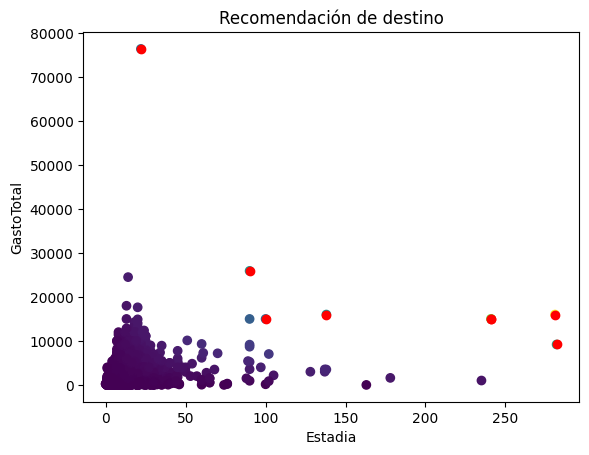

In [26]:
import matplotlib.pyplot as plt

plt.scatter(destinations['Estadia'], destinations['GastoTotal'], c=normalized_scores)
plt.scatter(recommendation['Estadia'], recommendation['GastoTotal'], c='red')
plt.xlabel('Estadia')
plt.ylabel('GastoTotal')
plt.title('Recomendación de destino')
plt.show()
#Visualiza los datos y presenta la recomendación final utilizando la biblioteca matplotlib o seaborn.